#課題１

##乱数生成

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.io import loadmat

In [0]:


np.random.seed(0)


def data_generate(n=3000):
    x = np.zeros(n)
    u = np.random.rand(n)
    index1 = np.where((0 <= u) & (u < 1 / 8))
    x[index1] = np.sqrt(8 * u[index1])
    index2 = np.where((1 / 8 <= u) & (u < 1 / 4))
    x[index2] = 2 - np.sqrt(2 - 8 * u[index2])
    index3 = np.where((1 / 4 <= u) & (u < 1 / 2))
    x[index3] = 1 + 4 * u[index3]
    index4 = np.where((1 / 2 <= u) & (u < 3 / 4))
    x[index4] = 3 + np.sqrt(4 * u[index4] - 2)
    index5 = np.where((3 / 4 <= u) & (u <= 1))
    x[index5] = 5 - np.sqrt(4 - 4 * u[index5])

    return x

In [0]:
data_generate(3)

array([3.44187557, 3.92777016, 3.64113454])

<BarContainer object of 50 artists>

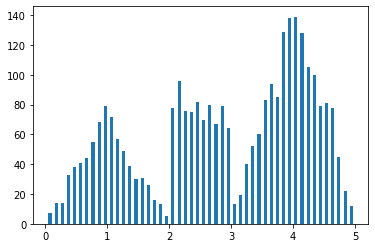

In [0]:
aa = np.histogram(data_generate(3000), bins =50)
a_bins = aa[1]
a_hist = aa[0]
X1 = []
for i in range(1, len(a_bins)):
    X1.append((a_bins[i-1]+a_bins[i])/2)
plt.bar(X1,a_hist, width=0.05)

*  以下のデータを用いて，ガウスカーネルに対するカーネル密度推定法を実行せよ
*  バンド幅は尤度交差確認により決定せよ

In [0]:
N = 10000
h = 0.7

In [0]:
def window(x):
    if abs(x) < 1/2:
        y = 1
    else:
        y = 0
    return (y)

In [0]:
def p(x , h = h, x_data =data_generate(N)):
    f = 0
    for xi in x_data:
        f += window((x - xi)/h)
    return f/(N*h)

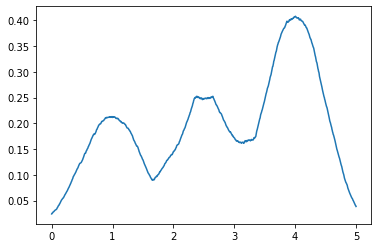

In [0]:
xx = np.linspace(0, 5, 1000)
pp = [p(xi) for xi in xx ]
plt.plot(xx, pp)

##交差確認

In [0]:
T, t , T_temp = list(), 100, []
x = (data_generate(N)).tolist()
for i in range(N):
    l = i+1
    if (l) % (N/t)  == 0:
        if l == N:
            T.append(T_temp)
        else:
            T_temp.append(x[l])
            T.append(T_temp)
            T_temp = []
    else:
        T_temp.append(x[l])
        if i == N:
            T.append(T_temp)
 

In [0]:
def Cross_Validation(T, h, t = 100,  N = 10000):   
    LCV = 0
    for i in range(t):
        T_kousa = []
        for l in range(t):
            if i != l:
                T_kousa.extend(T[l])
#        for mm in range(len(T[i])):
#            print(p(T[i][mm], h = h, x_data = T_kousa))
#            print(math.log(p(T[i][mm], h = h, x_data = T_kousa)))
        pp = [math.log(p(T[i][j], h = h, x_data = T_kousa)) for j in range(len(T[i])) if p(T[i][j], h = h, x_data = T_kousa) != 0]
        LCV+= sum(pp)/(len(T[i]) * t)
    
    return LCV

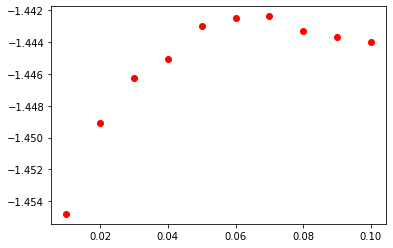

In [0]:
for h_temp in range(10):
    h = (h_temp + 1)/100
    LCV = Cross_Validation(T, h)
    plt.scatter(h, LCV, color = 'red')

In [0]:
LCV = Cross_Validation(T, 0.01)

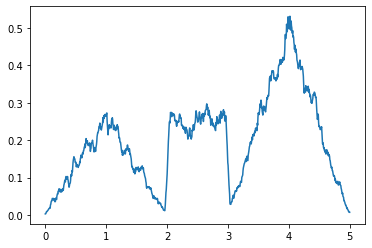

In [0]:
xx = np.linspace(0, 5, 1000)
pp = [p(xi, 0.07) for xi in xx ]
plt.plot(xx, pp)

#課題2

In [0]:
data = loadmat('digit.mat')
train = data['X']
test = data['T']
print(train[0].shape)
print(test.shape)

(500, 10)
(256, 200, 10)


In [0]:
print("Train data: {}".format(train.shape))
print("Test data:  {}".format(test.shape))

Train data: (256, 500, 10)
Test data:  (256, 200, 10)


(256,)


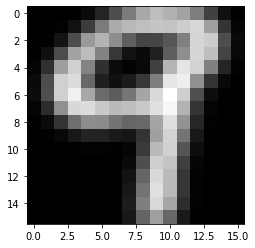

In [0]:
x=train[:, 26, 8]
print(x.shape)
plt.imshow(x.reshape(16, 16), 'gray')

In [0]:
a = np.array([1,2,3]).reshape(1,3)
b = np.array([4,5,6]).reshape(1,3)
print(a.shape, b.shape)
print(np.append(a, b, axis = 0))

(1, 3) (1, 3)
[[1 2 3]
 [4 5 6]]


In [0]:
for i in range(10):
    for j in range(200):
        if i == 0 and j == 0:
            x_test = test[:, j, i].reshape(1,256)
        else:
            x_temp = test[:, j, i].reshape(1,256)
            x_test = np.append(x_test,(x_temp), axis = 0)
print(x_test.shape)

(2000, 256)


In [0]:
for i in range(10):
    for j in range(500):
        if i == 0 and j == 0:
            x_train = train[:, j, i].reshape(1,256)
            y_train = np.eye(10)[i].reshape(1,10)
            x_test = test[:, j, i].reshape(1,256)
            y = i
        else:
            x_temp = train[:, j, i].reshape(1,256)
            x_train = np.append(x_train,(x_temp), axis = 0)
            y_temp = np.eye(10)[i].reshape(1,10)
            y_train = np.append(y_train, (y_temp), axis = 0)
            y_ = i
            y = np.append(y, i)

print(x_train.shape)
print(y_train)

(5000, 256)
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [0]:
def knn(train_x, train_y, test_x, k_list):
    print(x_train.shape)
    train_x = train_x.astype(np.float32)
    test_x = test_x.astype(np.float32)
    print(x_train[:, None].shape)
    print(train_x[None].shape)
#    dist_matrix = np.sqrt(np.sum((train_x[None] - test_x[:, None]) ** 2,axis=2))
    dist_matrix = np.sqrt(np.sum((train_x - test_x) ** 2))
    sorted_index_matrix = np.argsort(dist_matrix)
    ret_matrix = None
    print(sorted_index_matrix)     
    for k in k_list:
        knn_label = train_y[sorted_index_matrix[:, :k]]
   
        label_sum_matrix = None
        for i in range(10):
            predict = np.sum(np.where(knn_label == i, 1, 0), axis=1)[:, None]
            if label_sum_matrix is None:
                label_sum_matrix = predict
 #               print(k, predict)
            else:
                label_sum_matrix = np.concatenate([label_sum_matrix,
                                                   predict], axis=1)

        if ret_matrix is None:
            ret_matrix = np.argmax(label_sum_matrix, axis=1)[None]
        else:
            ret_matrix = np.concatenate([ret_matrix, np.argmax(
                label_sum_matrix, axis=1)[None]], axis=0)
    return ret_matrix  # ret_matrix.shape == (len(k_list), len(test_x))


In [0]:
knn(x_train, y_train, x_test, [0,1,2,3,4,5,6,7,8,9])

(5000, 256)
(5000, 1, 256)
(1, 5000, 256)
[0]


IndexError: ignored

In [0]:
y

array([0, 0, 0, ..., 9, 9, 9])